In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.stats as stats

mu, sigma = 0.2, 1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000000)

C:\Users\Chaya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


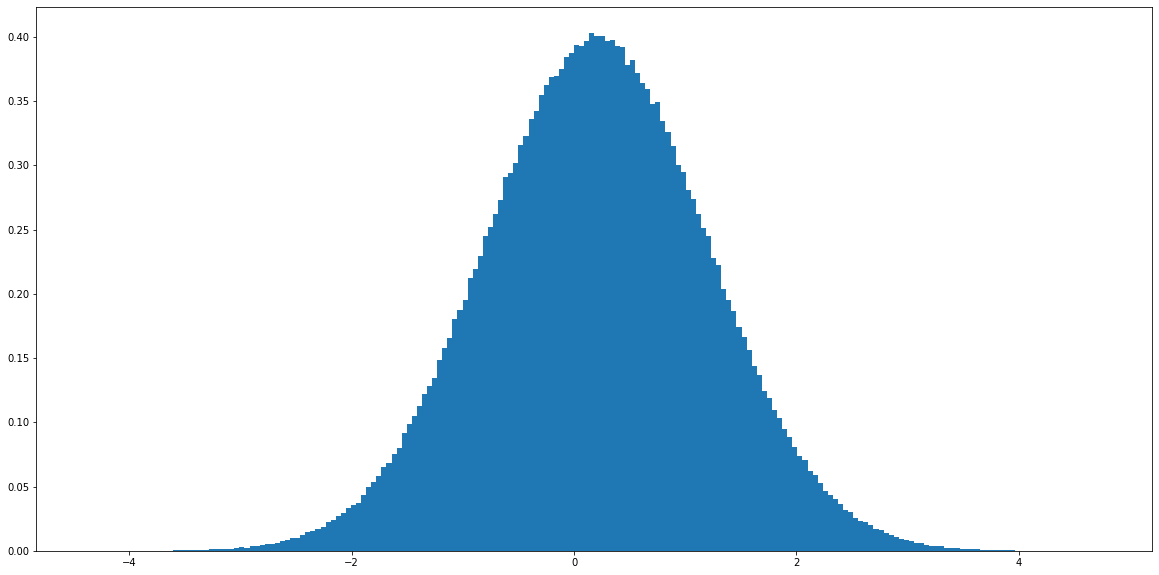

In [2]:
plt.figure(figsize=(20,10))
plt.hist(s, 200, normed=True)
plt.show()

In [3]:
## prob fall outside epsilon aka weak law of large number
# epsilon is error from the population's mean
# formula P(abs(X-mu) >= epsilon) = (sigma**2)/(n*(epsilon**2))
prob = []
l = []
for i in range(100,5000,100):
    # get sample
    l.append(i)
    rsmeanlist = []
    for y in range(0,50):
        rs = random.choices(s, k=i)
        mean = sum(rs)/len(rs)
        rsmeanlist.append(mean)
            
    # calculate probability
    prob.append(rsmeanlist)
            

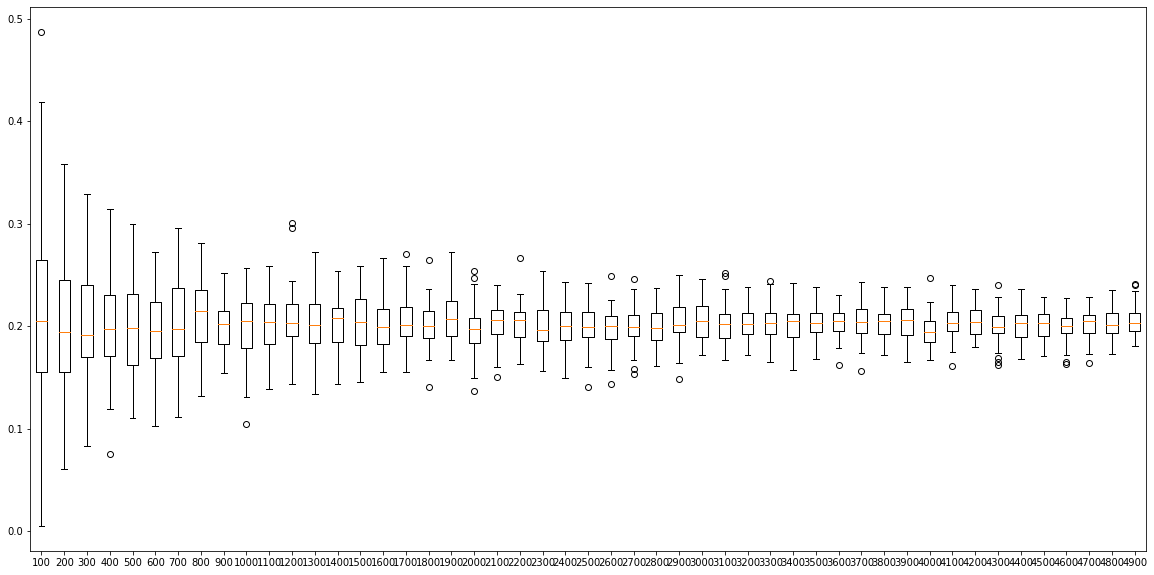

In [4]:
plt.figure(figsize=(20,10))
plt.boxplot(prob, labels=l)
plt.show()

In [63]:
## prob fall outside epsilon aka weak law of large number
# epsilon is error from the population's mean
# formula P(abs(X-mu) >= epsilon) = (sigma**2)/(n*(epsilon**2))
prob = []
l = []
epsilon = 0.005
nofsampling = 50
    
    
for i in range(50,20000,50):
    # get sample
    l.append(i)
    rs = random.choices(s, k=i)
    mean = sum(rs)/len(rs)
            
    # calculate probability
    prob.append(mean-mu)

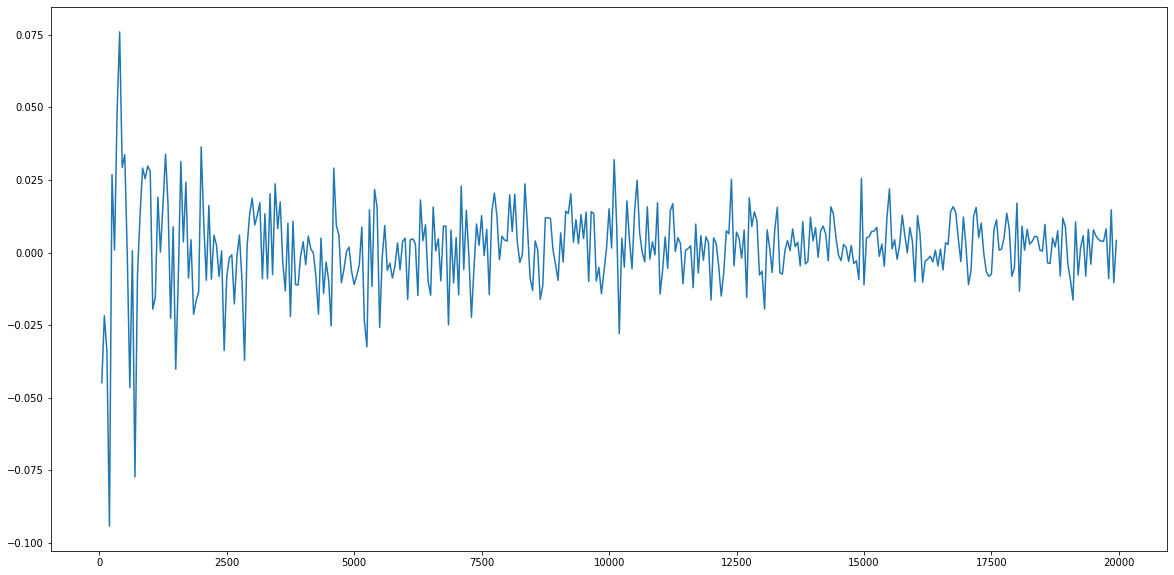

In [64]:
## make line smooth
from scipy.interpolate import make_interp_spline, BSpline

plt.figure(figsize=(20,10))
plt.plot(l,prob)
plt.show()

C:\Users\Chaya\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


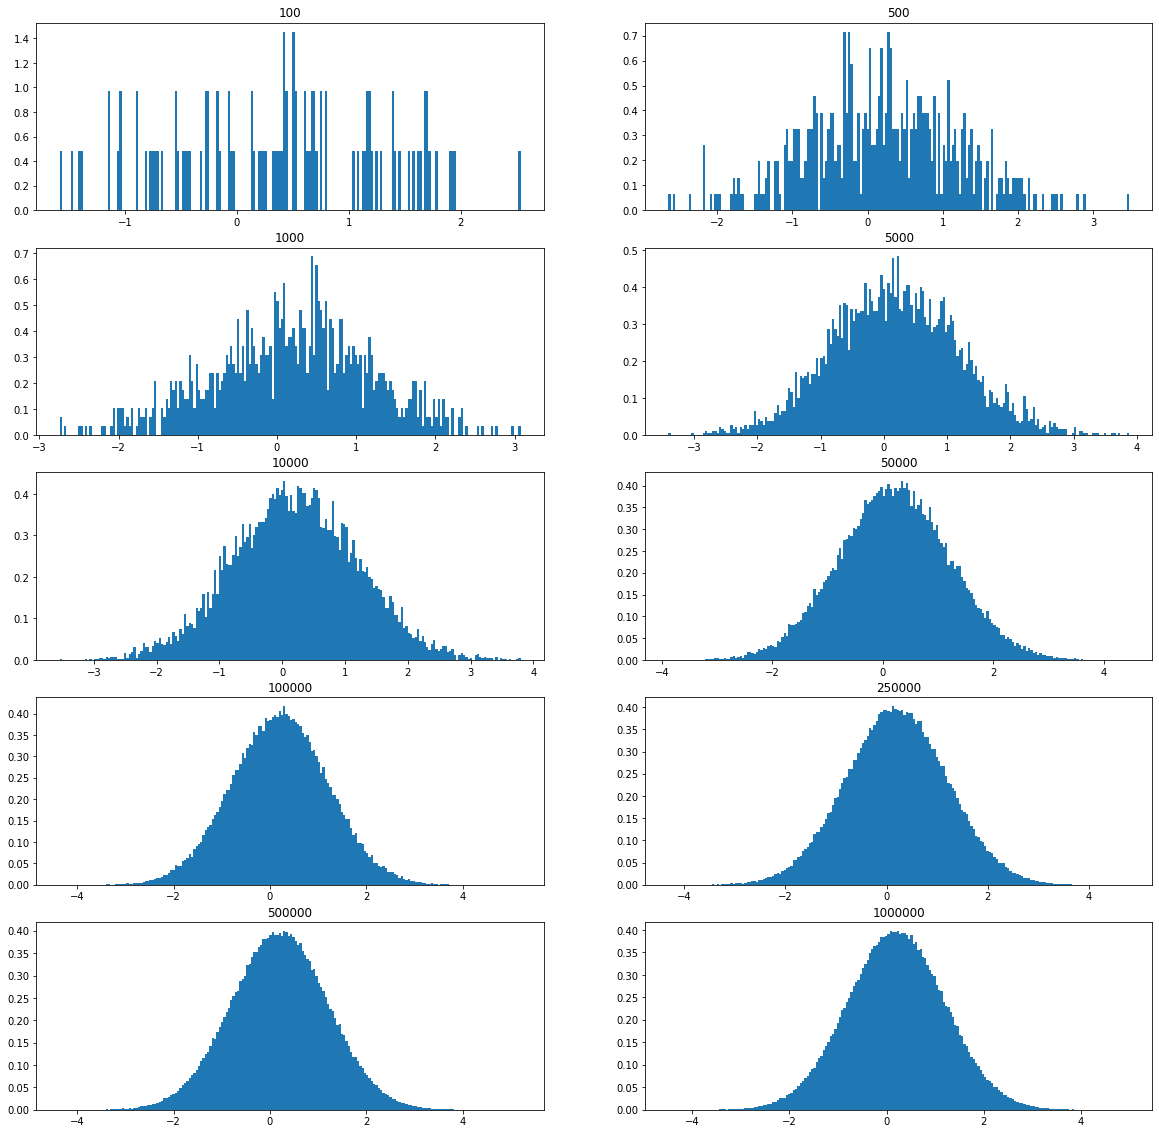

In [79]:
# plot prob
cols = 2
rows = 5
fig, ax = plt.subplots(rows, cols, figsize=(20,20))
l = [100,500,1000,5000,10000,50000,100000,250000,500000,1000000]
n = 0
for i in range(0, rows):
    for j in range(0, cols):
        rs = random.choices(s, k=l[n])
        ax[i, j].hist(rs, 200, normed=True)
        ax[i, j].set_title(label=l[n])
        n += 1

In [80]:
## bigger scaling distribution

populationsize = 1000000
pluslistofs = []
for i in range(1, 11):
    eachlistofs = np.zeros(populationsize, dtype=float)
    for j in range(0,i):
        eachlistofs += np.random.normal(mu, sigma, populationsize)
    pluslistofs.append(eachlistofs)

C:\Users\Chaya\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


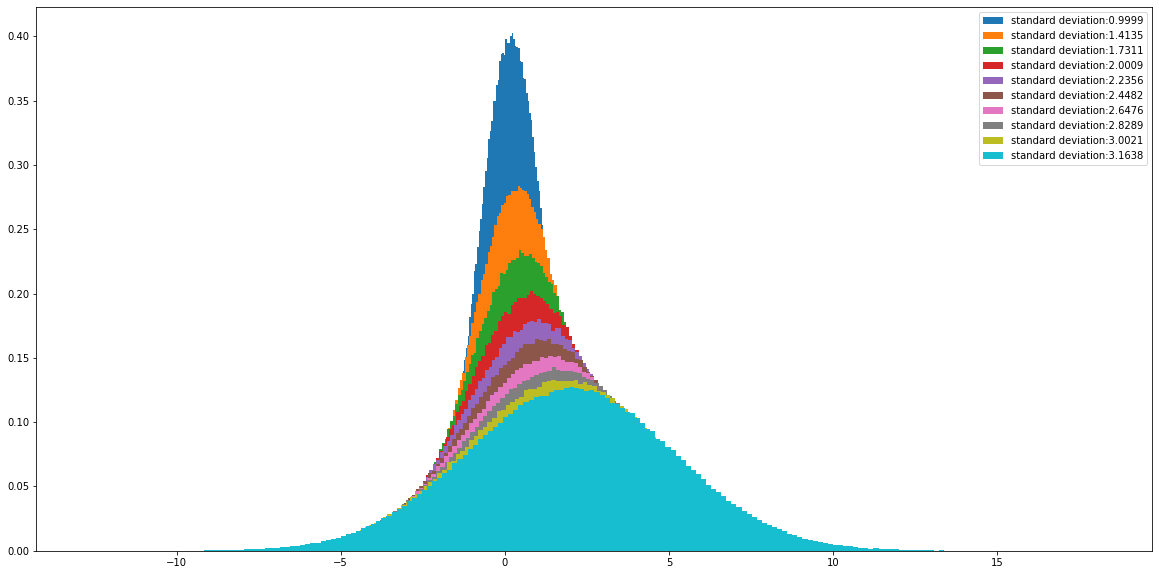

In [81]:
# plot bigger dis
plt.figure(figsize=(20,10))
for i in range(0,len(pluslistofs)):
    # "mean:" + str(np.round(pluslistofs[i].mean(),2)) + ",
    label = "standard deviation:" + str(np.round(pluslistofs[i].std(),4))
    plt.hist(pluslistofs[i], 200, normed=True, label=label)
plt.legend()
plt.show()

In [82]:
## smaller scaling distribution

populationsize = 1000000
minuslistofs = []
for i in range(1, 11):
    eachlistofs = np.zeros(populationsize, dtype=float)
    for j in range(0,i):
        eachlistofs -= np.random.normal(mu, sigma, populationsize)
    minuslistofs.append(eachlistofs)

C:\Users\Chaya\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


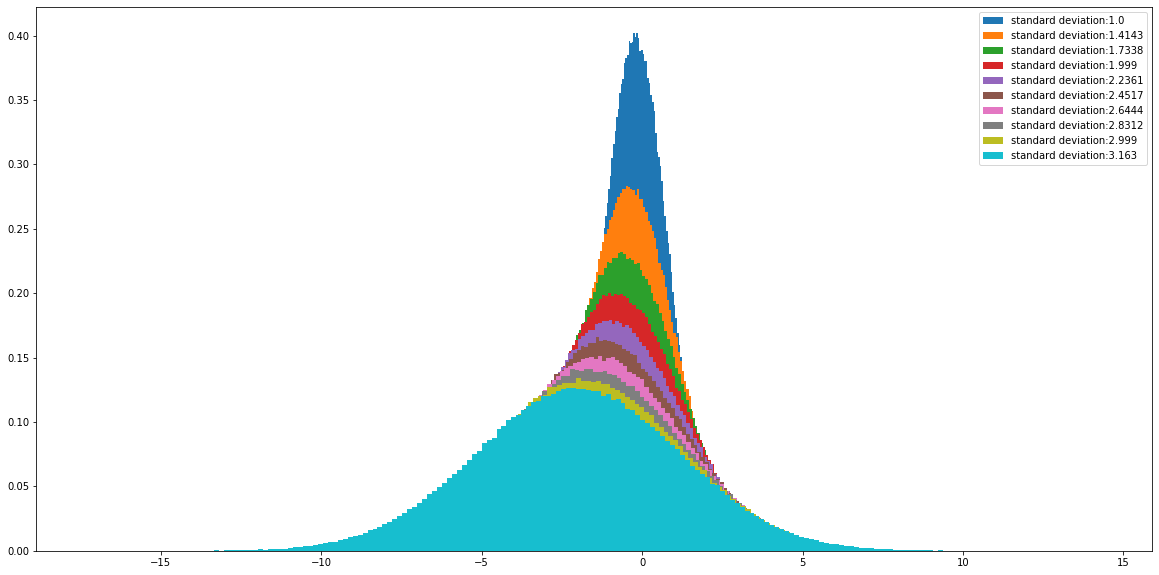

In [83]:
# plot bigger dis
plt.figure(figsize=(20,10))
for i in range(0,len(minuslistofs)):
    # "mean:" + str(np.round(minuslistofs[i].mean(),2)) + ",
    label = "standard deviation:" + str(np.round(minuslistofs[i].std(),4))
    plt.hist(minuslistofs[i], 200, normed=True, label=label)
plt.legend()
plt.show()

C:\Users\Chaya\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


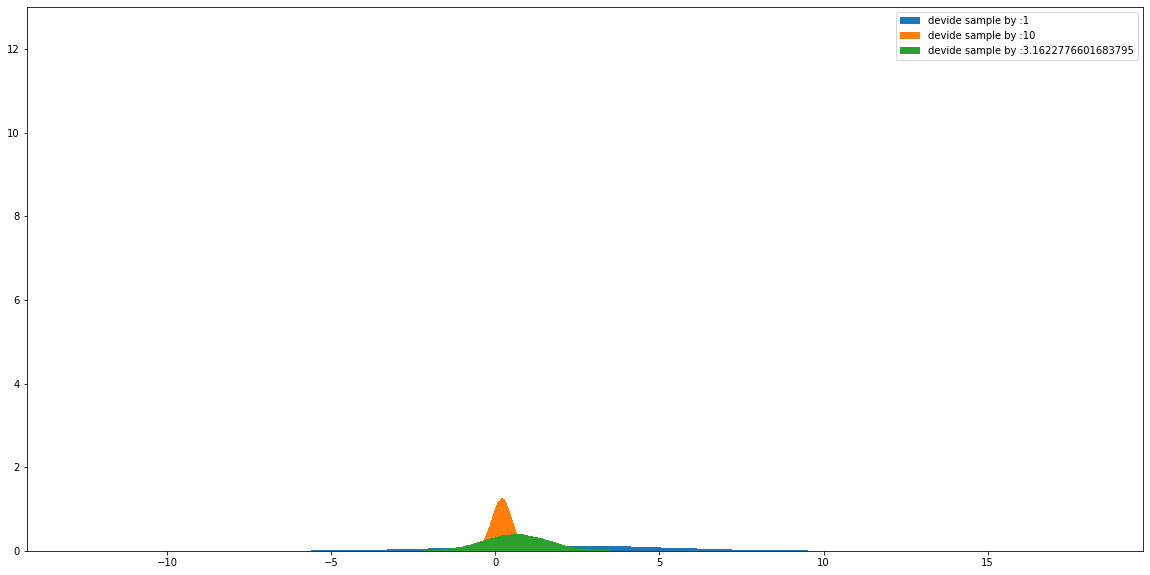

In [84]:
## change scale of sum of each sample to normal distribution
# get sum of 10 sample
s = pluslistofs[len(pluslistofs)-1]
n = 10 # number of multiplication of sample
l = [1,n,np.sqrt(n)]
# plot
plt.figure(figsize=(20,10))
for i in l:
    label = "devide sample by :" + str(i)
    plt.hist(s/i, 200, normed=True, label=label)
plt.legend()
plt.ylim([0,13])
plt.show()

C:\Users\Chaya\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


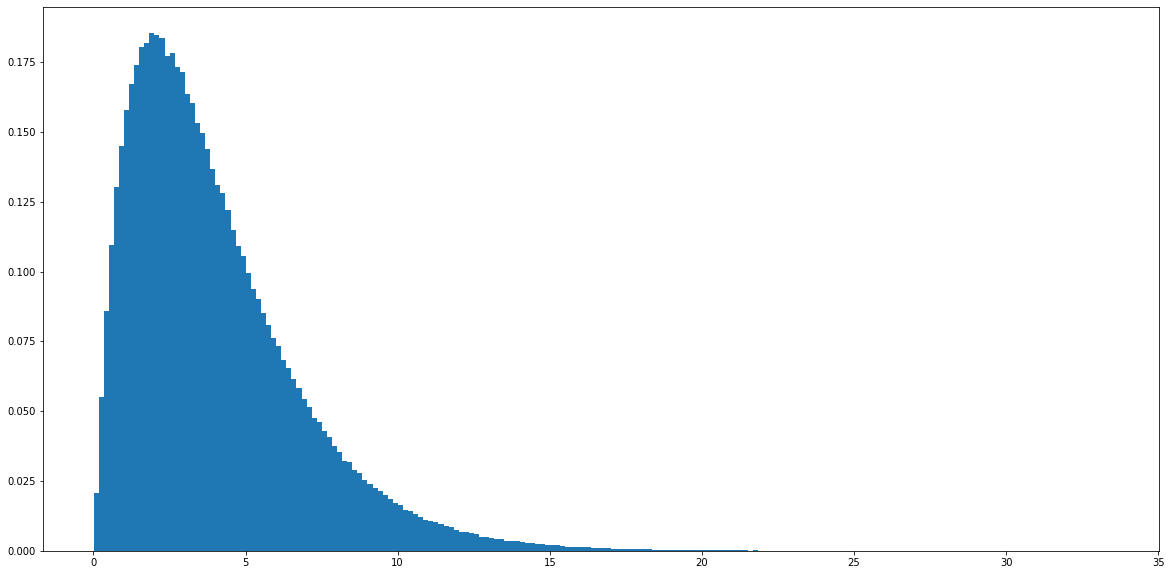

In [85]:
## Central limit theorom
# build gamma distribution population
shape, scale = 2., 2.  # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 1000000)
plt.figure(figsize=(20,10))
plt.hist(s, 200, normed=True)
plt.show()

In [86]:
## sample from population and stardardize
# sample 5000 at a time and sum
meansample = []
numofsample = [1000,2500,5000,10000,25000,50000]
samplesize = 500
# for standardize part
lastsam = []
for i in numofsample:
    eachmeansample = []
    for j in range(0,i):
        # create new distribution part
        rc = random.choices(s, k=samplesize)
        eachmeansample.append(sum(rc)/len(rc))
        # collect sample for standardize part
        if i == numofsample[len(numofsample)-1]:
            lastsam += rc
    meansample.append(eachmeansample)

C:\Users\Chaya\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


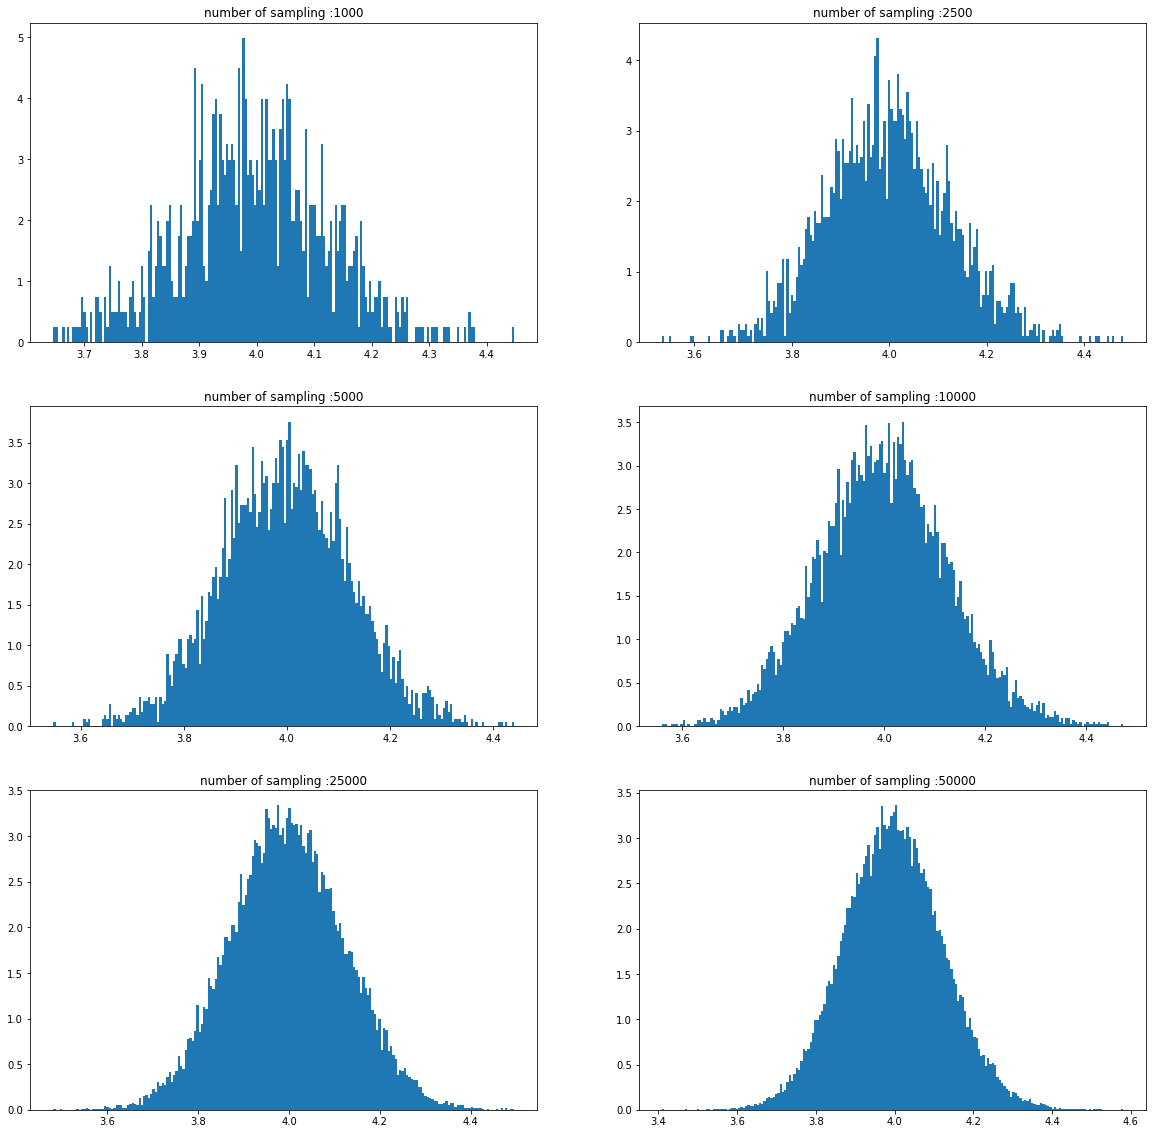

In [87]:
# plot
cols = 2
rows = 3
fig, ax = plt.subplots(rows, cols, figsize=(20,20))
n = 0
for i in range(0, rows):
    for j in range(0, cols):
        ax[i, j].hist(meansample[n], 200, normed=True)
        ax[i, j].set_title(label="number of sampling :" + str(numofsample[n]))
        n += 1

In [88]:
# standardize part
zn = []
nplastam = np.asarray(meansample[len(meansample)-1])
std = nplastam.std()
mean = nplastam.mean()
for i in nplastam:
    zn.append((i-mean)/std)

C:\Users\Chaya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


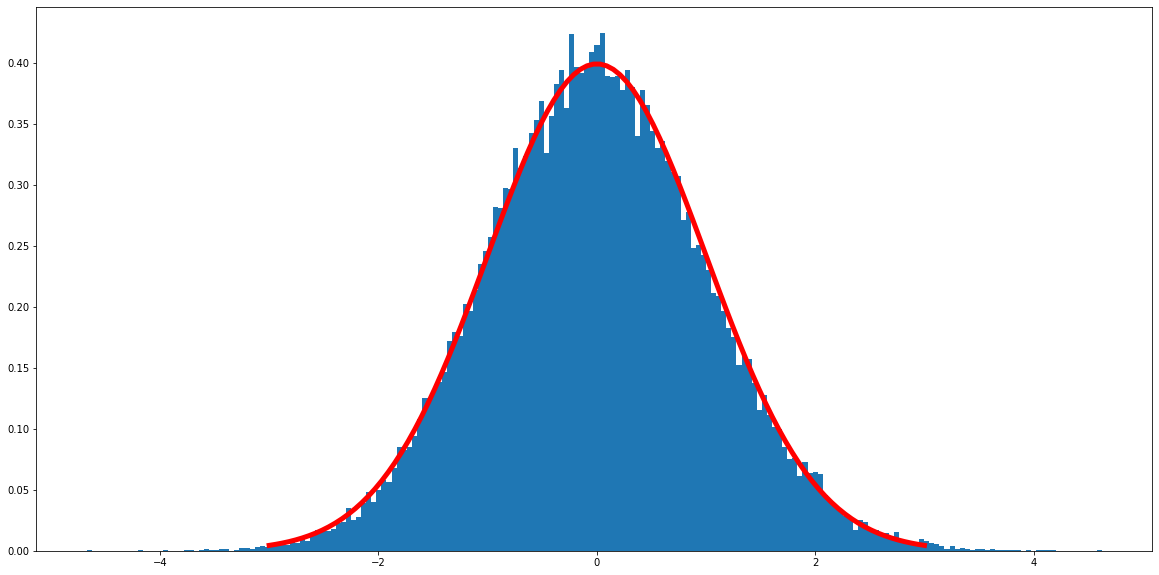

In [89]:
plt.figure(figsize=(20,10))
plt.hist(zn, 200, normed=True)
# compare with starndard normal disrtibution
mu = 0
sigma = 1
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma),linewidth = 5, color='red')
plt.show()

In [10]:
import sys
import time

time1l = []
time2l = []

for x in range(0,1000):

    start = time.time()

    j = 0
    
    for i in range(0,100000):
        j+=1
        j+=1

    time1l.append((time.time() - start))

    start = time.time()

    j = 0

    for i in range(0,100000):
        j+=1

    for i in range(0,100000):
        j+=1

    time2l.append((time.time() - start))
    
    sys.stdout.write("\r" + "Processing data: " + str(x))
    sys.stdout.flush()

Processing data: 999

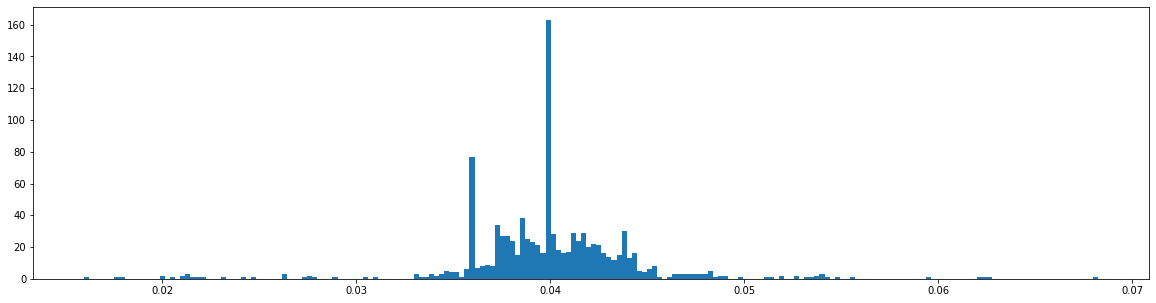

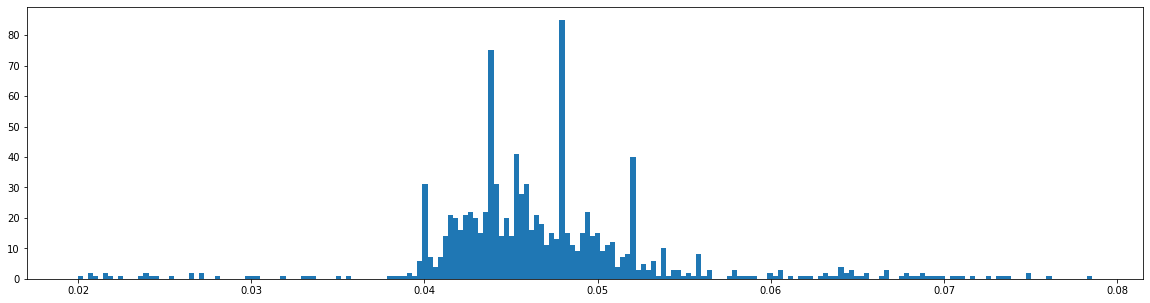

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(20,5))
plt.hist(time1l, 200)
plt.show()
plt.figure(figsize=(20,5))
plt.hist(time2l, 200)
plt.show()

In [13]:
import random
import numpy as np

meansample1 = []
meansample2 = []
samplesize = 500
# for standardize part
lastsam = []
eachmeansample1 = []
eachmeansample2 = []
for j in range(0,5000):
    # create new distribution part
    rc = random.sample(time1l, k=samplesize)
    eachmeansample1.append(sum(rc)/len(rc))

    rc = random.sample(time2l, k=samplesize)
    eachmeansample2.append(sum(rc)/len(rc))
    
    sys.stdout.write("\r" + "Processing data: " + str(j))
    sys.stdout.flush()

Processing data: 4999

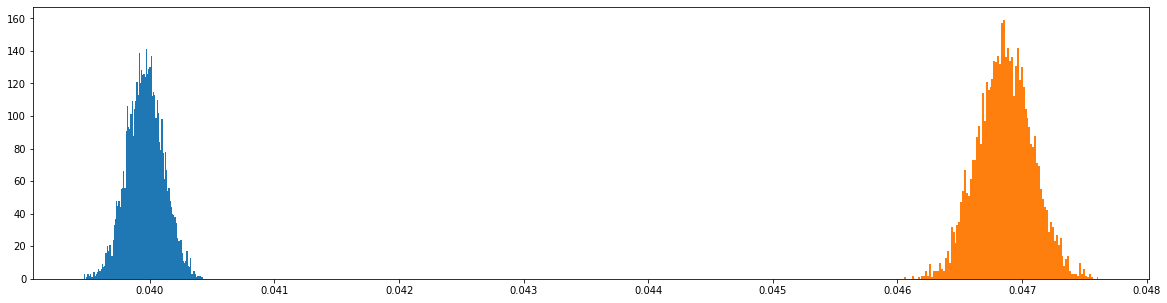

0.03996118455085754
0.04686099536705029


In [15]:
plt.figure(figsize=(20,5))
plt.hist(eachmeansample1, 100)
plt.hist(eachmeansample2, 100)
plt.show()

print(sum(eachmeansample1)/len(eachmeansample1))
print(sum(eachmeansample2)/len(eachmeansample2))